In [30]:
# import all the required libraries
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from textblob import Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Balanced_7200.csv")

In [26]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

7708

In [2]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [3]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'love': 1250,
         'joy': 1250,
         'surprise': 1250,
         'sadness': 1250,
         'fear': 1250,
         'anger': 1250})

In [4]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [5]:
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [6]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [7]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [8]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [9]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [10]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [11]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulties parents child b...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [12]:
# Do the lametization on the features
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulty parent child bett...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [13]:
x = df.content
y = df.Emot

In [14]:
SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [15]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))

Train set has total 5250 entries with 17.12% sadness, 16.38% joy, 16.82% love, 16.42% anger, 16.70% fear, 16.55% surprise
Test set has total 2250 entries with 15.60% sadness, 17.33% joy, 16.31% love, 17.24% anger, 16.58% fear , 16.93% surprise


In [16]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [17]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [18]:

def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [19]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [20]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [24]:
def classifivation_report(mf, ng, spl):
    ug_cvec = TfidfVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [25]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [22]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

7708

In [23]:
cvec = TfidfVectorizer()
n_features = np.arange(1500,6001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


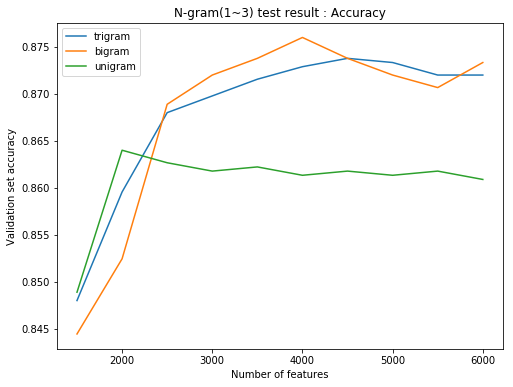

In [28]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(cvec, n_features, stp, cls)

In [31]:
mf_ = 4000
ng_ = (1,2)
spl_ = 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 87.60%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       307   16     4     13     8         3
joy            19  318    31      8    11         3
love            4   16   344      2     1         0
anger          29   14     7    320    17         1
fear           10    5     2     13   313        30
surprise        1    2     1      1     7       369
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.82      0.86       388
         joy       0.88      0.84      0.86       373
        love       0.86      0.82      0.84       390
       anger       0.88      0.94      0.91       367
        fear       0.83      0.87      0.85       351
    surprise       0.91      0.97      0.94       381

   micro avg       0.88      0

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


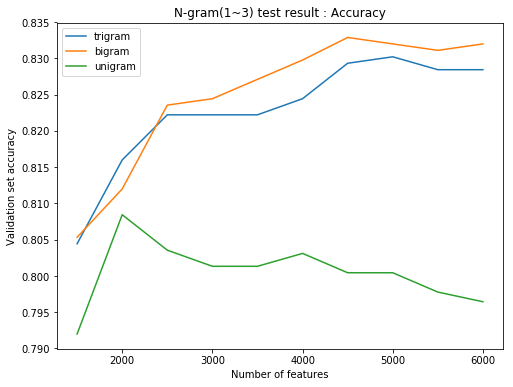

In [32]:
cls = MultinomialNB()
get_best_ngrams(cvec, n_features, stp, cls)

In [33]:
mf_ = 4500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 83.29%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       283   13    11     16    18        10
joy            24  283    36     11    16        20
love            8   16   330      2     7         4
anger          26   10    15    308    19        10
fear           12    1     6     11   313        30
surprise        1    5     5      2    11       357
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.79      0.83       388
         joy       0.82      0.84      0.83       373
        love       0.86      0.73      0.79       390
       anger       0.82      0.90      0.86       367
        fear       0.80      0.81      0.80       351
    surprise       0.83      0.94      0.88       381

   micro avg       0.83      0

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# ug_cvec = CountVectorizer(max_features=70000, ngram_range=(1, 3))
# ug_pipeline = Pipeline([
#         ('vectorizer', ug_cvec),
#         ('classifier', cls)
#     ])
# train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


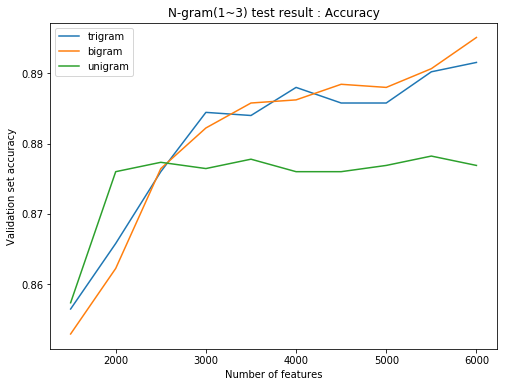

In [34]:
cls = LinearSVC()
get_best_ngrams(cvec, n_features, stp, cls)

In [36]:
mf_ = 6000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 89.51%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       310   12     4     11     9         5
joy            11  334    30      6     5         4
love            3   14   348      0     1         1
anger          21    5     8    335    16         3
fear            7    2     1     12   321        30
surprise        1    2     1      1    10       366
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.92      0.86      0.89       388
         joy       0.89      0.86      0.87       373
        love       0.91      0.86      0.88       390
       anger       0.89      0.95      0.92       367
        fear       0.88      0.88      0.88       351
    surprise       0.89      0.96      0.93       381

   micro avg       0.90      0

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


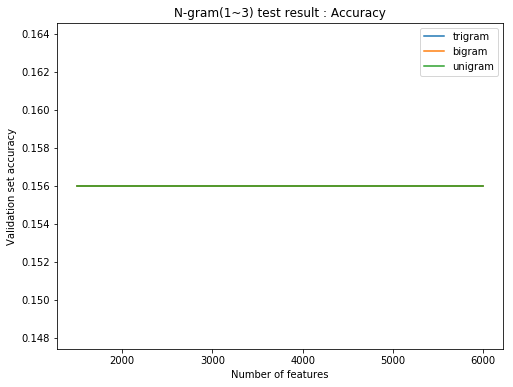

In [37]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(cvec, n_features, stp, cls)

In [38]:
mf_ = 4500
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 15.60%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       351    0     0      0     0         0
joy           390    0     0      0     0         0
love          367    0     0      0     0         0
anger         388    0     0      0     0         0
fear          373    0     0      0     0         0
surprise      381    0     0      0     0         0
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       388
         joy       0.00      0.00      0.00       373
        love       0.00      0.00      0.00       390
       anger       0.00      0.00      0.00       367
        fear       0.16      1.00      0.27       351
    surprise       0.00      0.00      0.00       381

   micro avg       0.16      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.148
0.24
0.14
0.18
0.15866666666666668
0.152
0.13866666666666666
0.14
0.152
0.15333333333333332
Avg Accuracy 0.16026666666666667


C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


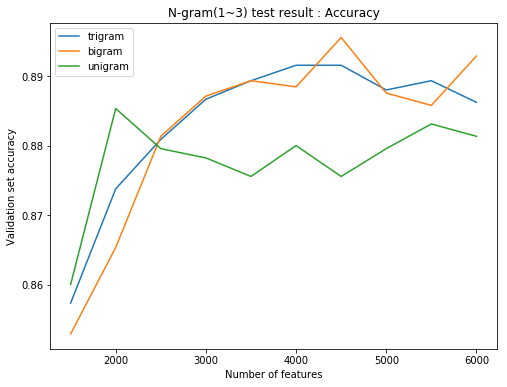

In [39]:
cls = SGDClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [40]:
mf_ = 5500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 88.67%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       302    9     8     17    11         4
joy            12  317    38      8     9         6
love            5    7   354      0     0         1
anger          20    5     5    337    17         4
fear            9    3     2     11   317        31
surprise        0    2     1      2     8       368
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.87      0.88       388
         joy       0.88      0.85      0.86       373
        love       0.92      0.81      0.86       390
       anger       0.87      0.96      0.91       367
        fear       0.87      0.86      0.86       351
    surprise       0.89      0.97      0.93       381

   micro avg       0.89      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9053333333333333
0.9
0.9093333333333333
0.8906666666666667
0.9106666666666666
0.9
0.9093333333333333
0.8813333333333333
0.8906666666666667
0.9293333333333333
Avg Accuracy 0.9026666666666667


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


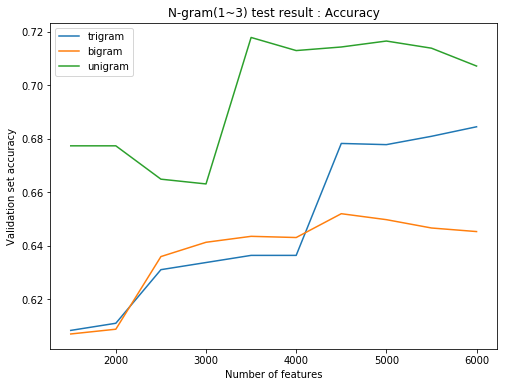

In [41]:
cls = KNeighborsClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [42]:
mf_ = 3500
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 71.78%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       242   26    13     39    24         7
joy            17  256    35     32    34        16
love           15   37   271     22    15         7
anger          20   13    16    309    18        12
fear            9   10     9     39   274        32
surprise       15   20    15     23    45       263
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.67      0.80      0.73       388
         joy       0.67      0.73      0.70       373
        love       0.71      0.66      0.68       390
       anger       0.75      0.74      0.75       367
        fear       0.76      0.69      0.72       351
    surprise       0.78      0.69      0.73       381

   micro avg       0.72      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


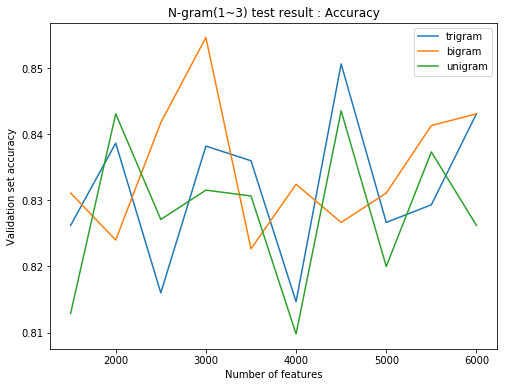

In [43]:
cls = RandomForestClassifier()
get_best_ngrams(cvec, n_features, stp, cls)

In [44]:
mf_ = 2500
ng_ = (1,1)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 83.56%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       249   63     6     16    13         4
joy            44  297    28      8     8         5
love            3   18   339      4     2         1
anger          15   18     6    324    22         3
fear            3   11     4     19   308        28
surprise        2    2     3      2     9       363
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.87      0.84      0.85       388
         joy       0.85      0.83      0.84       373
        love       0.73      0.76      0.74       390
       anger       0.88      0.92      0.90       367
        fear       0.79      0.71      0.75       351
    surprise       0.90      0.95      0.92       381

   micro avg       0.84      0